# All-to-all machine
This notebook shows the optimization and compilation for an All-To-All machine.

In [1]:
# Importing libraries
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.compiler import transpile


def optimiser(path: str):
    """
    Load a QASM file and optimized it.
    """
    qc = QuantumCircuit.from_qasm_file(path)
    backend = AerSimulator()
    backend.set_max_qubits(200) # Sets the maximum number of q-bits of the machine
    qc_native = transpile(qc, backend=backend, optimization_level=0, basis_gates = ['r', 'rzz'])
    return qc_native

def gatecount(circuit: QuantumCircuit):
    """
    Count the number of 2-qbit gates from a circuit.
    """
    return circuit.num_nonlocal_gates()


Now that we have defined the necessary functions. Lets see our circuit!

Number of 2-qbit gates BEFORE optimization:  1695


Underful Vlist: Vlist<w=2.56 h=3.16 d=0.00 s=0.00>[Hrule, Glue, Hlist<w=2.56 h=3.00 d=0.00 s=0.00>[Hbox, Hlist<w=1.88 h=3.00 d=0.00 s=0.00>[`X`, k0.01], Hbox]]
Underful Vlist: Vlist<w=2.56 h=3.16 d=0.00 s=0.00>[Hrule, Glue, Hlist<w=2.56 h=3.00 d=0.00 s=0.00>[Hbox, Hlist<w=1.88 h=3.00 d=0.00 s=0.00>[`X`, k0.01], Hbox]]


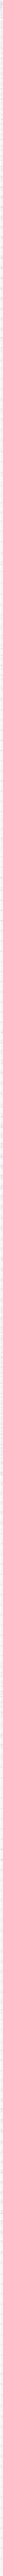

In [3]:
circuit_path = "big_circuits/3.qasm"
rglr_circuit = QuantumCircuit.from_qasm_file(circuit_path) # Loads the circuit from QASM
print("Number of 2-qbit gates BEFORE optimization: ", gatecount(rglr_circuit))
rglr_circuit.draw(output = "mpl", idle_wires=False, filename="optimized_circuit.png", scale=0.1, fold=10, vertical_compression="low")

Interesting... Lets see what happens when optimizing the circuit.

In [4]:
opt_circuit = optimiser(circuit_path)
print("Number of 2-qbit gates AFTER optimization: ", gatecount(opt_circuit))
opt_circuit.draw(output = "mpl", idle_wires=False, filename="optimized_circuit.png", scale=0.1, fold=10, vertical_compression="low")

Number of 2-qbit gates AFTER optimization:  1695
